# Added Resistance

> Fill in a module description here

In [ ]:
#| default_exp added_resistance
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from nbdev.showdoc import *

## STAwave-2 method

### Added resistance

Ref: ITTC - Recommended Procedures and Guidelines 7.5-04-01-01.2 Rev. 1 (2014)

The empirical method has been developed by STA-JIP to approximate the transfer function of the mean resistance increase in heading regular waves by using the main parameters such as ship
dimensions and speed. The method is applicable to the mean resistance increase in long crested irregular head waves $R_{AWL}$. The wave corrections are thus restricted to wave directions in the bow sector to $\pm 45$ degree off bow. Waves within the sector are corrected as head waves. Waves outside the $\pm 45$ sector are not corrected for.

The method is valid for the following conditions:

1. $75(m) \le L_{pp} \le 350(m)$
2. $4.0 \le \frac{L_{pp}}{B} \le 9.0$
3. $2.2 \le \frac{B}{T} \le 5.5$
4. $0.10 \le Fr \le 0.30$
5. $0.5 \le C_B \le 0.9$
6. Wave direction within 0 to $\pm 45$ degree from bow.

Where $L_{pp}$ is the length between perpendiculars, $B$ is the beam, $T$ is the draft, and $Fr$ is the Froude number.

This empirical transfer function covers both the mean resistance increase due to wave reflection $R_{AWR}$ and the motion induced resistance $R_{AWM}$.

$$R_{AWM} = 4 \rho g \zeta_A^2 \frac{B^2}{L_{pp}} \overline{raw}(\omega)$$
$$\overline{raw}(\omega) = \overline{\omega}^{b_1} \exp\left\{\frac{b_1}{d_1} \left(1 - \overline{\omega}^d_1\right)\right\} a_1 Fr^{1.5} \exp(-3.5Fr)$$
$$\overline{\omega} = \frac{\sqrt{\frac{L_{pp}}{g}} \sqrt[3]{k_{yy}}}{1.17Fr^{-0.143}} \omega$$
$$a_1 = 60.3 C_B^{1.34}$$
$$b1 = \left\{\begin{array}{ll}
    11.0 & \mbox{for $\overline{\omega} \le 1$} \\
    -8.50 & \mbox{elsewhere}
\end{array}\right.$$
$$d_1 = \left\{\begin{array}{ll}
    14.0 & \mbox{for $\overline{\omega} \le 1} \\
    -566 \left(\frac{L_{pp}}{B}\right)^{-2.66} & \mbox{elsewhere}
\end{array}\right.$$

and

$$R_{AWR} = \frac{1}{2} \rho g \zeta_A^2 B \alpha_1(\omega)$$
$$\alpha_1(\omega) = \frac{\pi^2 I_1^2 \left(1.5kT_m\right)}{\pi^2 I_1^2 \left(1.5kT_m\right) + K_1^2\left(1.5kT_m\right)}f_1$$
$$f_1 = 0.692 \frac{V_s}{\sqrt{T_m g}}^{0.769} + 1.81{C_B}^{6.95}$$

where:

$C_B$:block coefficient,

$k_{yy}$: non-dimensional radius of gyration in lateral direction,

$L_{pp}$: ship length between perpendiculars,

$T_m$: Draught at midship,

$I_1$: modified Bessel function of the first kind of order 1,

$K_1$: modified Bessel function of the second kind of order 1,

Finally,

$$R_{AWL} = 2 \int_0^\infty \frac{R_{AWR} + R_{AWM}}{\zeta_A^2}S_f(\omega) d\omega$$

### Wave spectrum
Ref: The Specialist Committee on Waves: Final Report and Recommendations to the 23rd ITTC, Proceedings of the 23rd ITTC – Volume II, 2003
Ref: ITTC – Recommended Procedures and Guidelines: Seakeeping Experiments 7.5-02 07-02.12014
Ref: SEA STATE PARAMETERS AND ENGINEERING WAVE SPECTRA, https://folk.ntnu.no/oivarn/hercules_ntnu/LWTcourse/partB/3seastate/3%20SEA%20STATE%20PARAMETERS%20AND%20ENGINEERING%20WAVE%20SPECTRA.htm

Ref: Lee, U.-J.; Jeong, W.-M.; Cho, H.-Y. Estimation and Analysis of JONSWAP Spectrum Parameter Using Observed Data around Korean Coast. J. Mar. Sci. Eng. 2022, 10, 578. https://doi.org/10.3390/jmse10050578
Ref: Goda, Y. Random Seas and Design of Maritime Structures; World Scientific Publishing Company: Singapore, 2010; Volume 33.

From the recommendation of ITTC for wave parameters, the spectral enegy density proposed by Pierson and Moskowitz is expressed as
$$S(\omega) = \frac{A}{\omega^5}\exp\left(-\frac{B}{\omega^4}\right)$$
In the original work by Pierson and Moskowitz both A and B were related to the wind speed 19.5 m above the mean sea surface, but today A and B are in some way related to the main sea state parameters. Recommendation from ITTC in 1978 gives
$$A = 173\frac{h_s^2}{T_1^4}$$
$$B = \frac{691}{T_1^4}$$
where, $T_1$ is mean wave period and $h_s$ is significant wave height.

For JONSWAP spectrum, the following formulation and parameters are recommended in 1984,
$$S(\omega) = \frac{A}{\omega^5} \exp\left(-\frac{B}{\omega^4}\right)
\gamma^p$$

where,
$$A = 155\frac{h_s^2}{T_1^4}$$
$$B = \frac{944}{T_1^4}$$
$$p = \exp\left[-\frac{\left(0.191 \omega T_1 - 1\right)^2}{2 \sigma_0^2}\right]$$

The default value for $\gamma$ is 3.3 for North Sea. It can be used as a control parameter for the shape of the spectrum.

From the work by Lee et al.(2022), the JONSWAP spectrum is expressed as,

$$S(f) = \frac{\alpha g^2}{\left(2\pi\right)^4} f^{-5} \exp\left[-1.25 \left(T_p f \right)^{-4}\right] \gamma{p}$$
$$p = \exp\left[-\frac{\left(T_p f - 1\right)^2}{2 \sigma^2}\right]$$
$$\sigma \approx \left\{\begin{array}
    0.07, & f \leq f_p \\
    0.09, & f \gt f_p
\end{array}\right.$$

where the Philips parameter $\alpha = 0.0081$. This spectrum can be expressed in terms of $h_s$ and $f_p$ according to work by Goda,

$$S(f)=B h_s^2 T_p^{−4} f^{−5} \exp\left[−1.25 \left(T_p f \right)^{−4}\right] \gamma^{p∗} $$
$$B = \frac{0.0624(1.094 - 0.01915 \log \gamma)}{0.230 + 0.0336 \gamma − 0.185\left(1.9 + \gamma\right)^{−1}}$$
$$T_p = \frac{T_{1/3}}{1 − 0.132\left(\gamma + 0.2\right)^{−0.559}}$$

where $\gamma = 3.3$ for North Sea.

In [ ]:
#| export
import logging
import os
from abc import ABC, abstractmethod
from dataclasses import dataclass
from functools import cached_property
from typing import Callable, Union, TypeVar, Tuple

import pandas as pd
from operation_profile_lib.operation_profile_structure import Weather
from scipy import interpolate
from scipy.special import jv, yv
from scipy.integrate import quad, dblquad, simpson
from scipy.special import gamma

from ship_model_lib.types import WaveSpectrumType, ShipType
from ship_model_lib.utility import get_interpolation_1d_function, Interpolated1DValue, kn_to_m_per_s
from ship_model_lib.ship_dimensions import ShipDimensionsAddedResistance
import numpy as np

In [ ]:
#| export
Numeric = TypeVar("Numeric", float, np.ndarray)

# Define logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)

logger.addHandler(ch)

RHO = 1025.0
RHO_AIR = 1.293
GRAVITY = 9.81
_PATH_TO_CX_DATA = os.path.join("ship_model_lib", "data", "drag_coefficient.csv")
if not os.path.exists(_PATH_TO_CX_DATA):
    dir_path = os.path.dirname(os.path.abspath(__file__))
    _PATH_TO_CX_DATA = os.path.join(dir_path, "data", "drag_coefficient.csv")
    assert os.path.exists(_PATH_TO_CX_DATA), f"File {_PATH_TO_CX_DATA} does not exist."

@dataclass
class AddedResistanceBySeaMarginCurve:
    sea_margin_perc: np.ndarray
    significant_wave_height_m: np.ndarray

    @cached_property
    def _wave_height_to_sea_margin_interpolation_function(
        self,
    ) -> Callable[[Numeric], Interpolated1DValue]:
        x = self.significant_wave_height_m
        y = self.sea_margin_perc
        if len(x) == 2:
            x = np.insert(x, 1, x.mean())
            y = np.insert(y, 1, y.mean())
        kind = "linear" if np.all(y == y[0]) else "cubic"
        return get_interpolation_1d_function(x=x, y=y, add_origo=True, kind=kind)

    def get_sea_margin_percent(self, *, significant_wave_height_m: Numeric):
        return self._wave_height_to_sea_margin_interpolation_function(
            significant_wave_height_m
        ).value


@dataclass
class PiersonMoskowitzSpectrumITTC1978:
    """
    The two-parameter Pierson-Moskowitz spectrum is defined by the two parameters A and B.
    """
    significant_wave_height_m: float
    mean_wave_period_s: float

    @property
    def _a_coefficient(self) -> float:
        return 173 * self.significant_wave_height_m ** 2 / self.mean_wave_period_s ** 4

    @property
    def _b_coefficient(self) -> float:
        return 691 / self.mean_wave_period_s ** 4

    def get_spectral_density_omega(self, *, omega_rad_per_s: Numeric) -> Numeric:
        return (
            self._a_coefficient
            / np.power(omega_rad_per_s, 5)
            * np.exp(
                -self._b_coefficient
                / np.power(omega_rad_per_s, 4)
            )
        )


@dataclass
class JONSWAPSpectrumITTC1984:
    """
    The JONSWAP spectrum is defined by the three parameters A, B and gamma.
    """
    significant_wave_height_m: float
    mean_wave_period_s: float
    gamma: float = 3.3

    @property
    def _a_coefficient(self) -> float:
        return (
            155
            * np.power(self.significant_wave_height_m, 2)
            / np.power(self.mean_wave_period_s, 4)
        )

    @property
    def _b_coefficient(self) -> float:
        return 944 / np.power(self.mean_wave_period_s, 4)

    def _get_exponent_for_peak_shape_parameter(
        self, omega_rad_per_s: Numeric
    ) -> Numeric:
        if np.isscalar(omega_rad_per_s):
            sigma = 0.07 if omega_rad_per_s < (5.24 / self.mean_wave_period_s) else 0.09
        else:
            sigma = np.zeros_like(omega_rad_per_s)
            sigma[omega_rad_per_s < (5.24 / self.mean_wave_period_s)] = 0.07
            sigma[omega_rad_per_s >= (5.24 / self.mean_wave_period_s)] = 0.09
        return np.exp(
            -np.power(0.191 * omega_rad_per_s * self.mean_wave_period_s - 1, 2)
            / (2 * sigma)
        )

    def get_spectral_density_omega(self, *, omega_rad_per_s: Numeric) -> Numeric:
        return (
            self._a_coefficient
            / np.power(omega_rad_per_s, 5)
            * np.exp(
                -self._b_coefficient
                / np.power(omega_rad_per_s, 4)
            )
            * np.power(self.gamma, self._get_exponent_for_peak_shape_parameter(omega_rad_per_s))
        )


def get_wave_length(wave_frequency_rad_per_s: Numeric) -> Numeric:
    return 2 * np.pi * GRAVITY / np.power(wave_frequency_rad_per_s, 2)

def get_wave_frequency(wave_length_m: Numeric) -> Numeric:
    return np.sqrt(2 * np.pi * GRAVITY / wave_length_m)

@dataclass
class AddedResistance(ABC):
    ship_dimension: ShipDimensionsAddedResistance
    wave_spectrum_type: WaveSpectrumType = WaveSpectrumType.PIERSON_MOSKOWITZ_ITTC_1978
    gamma: float = 3.3
    _PERIOD_LOW_LIM = 2.0

    @property
    def _omega_high_lim(self):
        return 2 * np.pi / self._PERIOD_LOW_LIM

    def _get_wave_spectrum(self, *, weather: Weather) \
            -> Union[PiersonMoskowitzSpectrumITTC1978, JONSWAPSpectrumITTC1984]:
        """Returns the wave spectrum object."""
        if self.wave_spectrum_type == WaveSpectrumType.PIERSON_MOSKOWITZ_ITTC_1978:
            return PiersonMoskowitzSpectrumITTC1978(
                significant_wave_height_m=weather.significant_wave_height_m,
                mean_wave_period_s=weather.mean_wave_period_s,
            )
        elif self.wave_spectrum_type == WaveSpectrumType.JONSWAP_ITTC_1984:
            return JONSWAPSpectrumITTC1984(
                significant_wave_height_m=weather.significant_wave_height_m,
                mean_wave_period_s=weather.mean_wave_period_s,
                gamma=self.gamma,
            )
        else:
            raise ValueError(f"Unknown wave spectrum type: {self.wave_spectrum_type}")

    def _get_froude_number(self, speed_m_per_s: float) -> float:
        """Calculate the Froude number"""
        lwl = self.ship_dimension.lwl_length_water_line_m
        if lwl == 0:
            lwl = self.ship_dimension.lpp_length_between_perpendiculars_m
        return speed_m_per_s / np.sqrt(lwl * GRAVITY)

    @abstractmethod
    def get_added_resistance_newton(
        self,
        vessel_speed_kn: Numeric,
        weather: Weather,
        heading_deg: Numeric = None,
        verbose: bool = False
    ) -> Numeric:
        """Calculate added resistance for a given speed and weather"""
        pass

    @abstractmethod
    def _validate_the_condition(
        self,
        speed_m_per_s: float,
    ):
        """Validate the condition"""
        pass

    @staticmethod
    def _get_encounter_angle_deg(
        *,
        wave_direction_deg: Numeric,
        heading_deg: Numeric
    ) -> Numeric:
        """Calculate the encounter angle between the wave and the ship"""
        wave_encounter_angles = (wave_direction_deg - heading_deg) % 360
        if np.isscalar(wave_encounter_angles):
            if wave_encounter_angles > 180:
                wave_encounter_angles = 360 - wave_encounter_angles
        else:
            wave_encounter_angles[wave_encounter_angles > 180] = \
                360 - wave_encounter_angles[wave_encounter_angles > 180]
        return wave_encounter_angles


@dataclass
class AddedResistanceByStaWave2(AddedResistance):

    def get_added_resistance_newton(
        self,
        vessel_speed_kn: Numeric,
        weather: Weather,
        heading_deg: Numeric = None,
        verbose: bool = False
    ) -> Numeric:
        """Calculate added resistance for a given speed and weather"""
        vessel_speed_kn = np.atleast_1d(vessel_speed_kn)
        if weather.significant_wave_height_m is None or weather.mean_wave_period_s is None:
            raise ValueError("Weather must contain significant wave height and mean wave period")
        added_resistance_result_list = []
        wave_encounter_angles = np.zeros_like(vessel_speed_kn)
        if heading_deg is not None:
            heading_deg = np.atleast_1d(heading_deg)
            if weather.wave_direction_deg is None:
                raise ValueError("Weather must contain wave direction when heading is given")
            wave_encounter_angles = self._get_encounter_angle_deg(
                wave_direction_deg=np.atleast_1d(weather.wave_direction_deg),
                heading_deg=heading_deg
            )
        for index, speed in enumerate(vessel_speed_kn):
            speed_m_per_s = kn_to_m_per_s(speed)
            self._validate_the_condition(speed_m_per_s=speed_m_per_s)
            if np.abs(wave_encounter_angles[index]) > 45 \
                    or weather.significant_wave_height_m[index] == 0:
                added_resistance_result_list.append(0)
            else:
                added_resistance_result_list.append(2 * quad(
                    func=self.get_resistance_component_in_frequency,
                    a=1e-3,
                    b=self._omega_high_lim,
                    args=(speed_m_per_s, weather.get_weather_at_index(index=index))
                )[0])
        return np.array(added_resistance_result_list)

    def get_resistance_component_in_frequency(
        self,
        omega_rad_per_s: float,
        speed_m_per_s: float,
        weather: Weather,
    ) -> float:
        """Calculate the resistance component in frequency domain"""
        wave_spectrum = self._get_wave_spectrum(weather=weather)
        added_resistance_due_to_motion = self.get_resistance_due_to_motion(
            omega_rad_per_s=omega_rad_per_s, speed_m_per_s=speed_m_per_s, weather=weather
        )
        added_resistance_due_to_reflection = self.get_resistance_due_to_reflection(
            omega_rad_per_s=omega_rad_per_s, speed_m_per_s=speed_m_per_s, weather=weather
        )
        return (
            (added_resistance_due_to_reflection + added_resistance_due_to_motion)
            * wave_spectrum.get_spectral_density_omega(omega_rad_per_s=omega_rad_per_s)
            / np.power(weather.significant_wave_height_m, 2)
        )

    def get_resistance_due_to_reflection(
        self, *, omega_rad_per_s: float, speed_m_per_s: float, weather: Weather
    ):
        """Calculate the resistance due to motion"""
        return (
            0.5
            * RHO
            * GRAVITY
            * np.power(weather.significant_wave_height_m, 2)
            * self.ship_dimension.b_beam_m
            * self._get_alpha1(omega_rad_per_s=omega_rad_per_s, speed_m_per_s=speed_m_per_s)
        )

    def _get_alpha1(self, *, omega_rad_per_s: float, speed_m_per_s: float) -> float:
        """Calculate alpha1"""
        wave_number = np.power(omega_rad_per_s, 2) / GRAVITY
        bess = 1.5 * wave_number * self.ship_dimension.tm_draft_mid_m
        i1 = jv(1, bess)
        k1 = yv(1, bess)
        pi_squared = np.power(np.pi, 2)
        return (
            pi_squared
            * np.power(i1, 2)
            * self._get_f1(speed_m_per_s=speed_m_per_s)
            / (pi_squared * np.power(i1, 2) + np.power(k1, 2))
        )

    def _get_f1(self, *, speed_m_per_s: float) -> float:
        """Calculate f1"""
        tm_draft = self.ship_dimension.tm_draft_mid_m
        return (
            0.692
            * np.power(
                speed_m_per_s / np.sqrt(tm_draft * GRAVITY),
                0.769
            )
            + 1.81 * np.power(self.ship_dimension.cb_block_coefficient, 6.95))

    def get_resistance_due_to_motion(
        self, *, omega_rad_per_s: float, speed_m_per_s: float, weather: Weather
    ):
        """Calculate the resistance due to reflection"""
        return (
            4
            * RHO
            * GRAVITY
            * np.power(weather.significant_wave_height_m, 2)
            * np.power(self.ship_dimension.b_beam_m, 2)
            * self._get_raw(omega_rad_per_s=omega_rad_per_s, speed_m_per_s=speed_m_per_s)
            / self.ship_dimension.lpp_length_between_perpendiculars_m
        )

    def _get_raw(self, *, omega_rad_per_s: float, speed_m_per_s: float) -> float:
        """Calculate the average resistance"""
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        lwl = self.ship_dimension.lwl_length_water_line_m
        if lwl == 0:
            lwl = lpp
        b = self.ship_dimension.b_beam_m
        kyy = self.ship_dimension.kyy_radius_gyration_in_lateral_direction_non_dim
        froude_number = speed_m_per_s / np.sqrt(lwl * GRAVITY)
        frequency_factor = (
                np.sqrt(lpp / GRAVITY)
                * np.power(kyy, 1 / 3)
                * omega_rad_per_s
                / (1.17 * np.power(froude_number, -0.143))
        )
        b1 = 11.0 if frequency_factor < 1.0 else -8.5
        d1 = 14.0 if frequency_factor < 1.0 else -566 * np.power(lpp / b, -2.66)
        a1 = 60.3 * np.power(self.ship_dimension.cb_block_coefficient, 1.34)
        return (
            np.power(frequency_factor, b1)
            * np.exp(b1 / d1 * (1 - np.power(frequency_factor, d1)))
            * a1
            * np.power(froude_number, 1.5)
            * np.exp(-3.5 * froude_number)
        )

    def _validate_the_condition(
        self,
        speed_m_per_s: float,
    ):
        """Validate the condition"""
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        b = self.ship_dimension.b_beam_m
        t = self.ship_dimension.tm_draft_mid_m
        fr = self._get_froude_number(speed_m_per_s=speed_m_per_s)
        cb = self.ship_dimension.cb_block_coefficient
        if lpp < 75 or lpp > 350:
            logger.warning("Lpp is out of range. It should be between 75 and 350.")
        if lpp / b < 4.0 or lpp / b > 9.0:
            logger.warning("Lpp/B is out of range. It should be between 4 and 9.")
        if b / t < 2.2 or b / t > 5.5:
            logger.warning("B/T is out of range. It should be between 2.2 and 5.5.")
        if fr < 0.1 or fr > 0.3:
            logger.warning("Froude number is out of range. It should be between 0.1 and 0.3.")
        if cb < 0.5 or cb > 0.9:
            logger.warning("Cb is out of range. It should be between 0.5 and 0.9.")


## SNNM Methods (Liu and Papanikolaou, 2020)

In [ ]:
#| export
@dataclass
class AddedResistanceBySNNM(AddedResistance):
    ship_type: ShipType = None
    length_of_entrance: float = None
    length_of_run: float = None
    _PERIOD_LOW_LIM = 3.0
    """
    Added resistance by SNNM method as described in ITTC - Recommended Procedures and Guidelines
    for the Preparation, Conduct and Analysis of Speed/Power Trials, 2021, Rev 06
    """

    def __post_init__(self):
        """Initialize"""
        if self.length_of_entrance is None:
            self.length_of_entrance = self._get_length_of_entrance()
        if self.length_of_run is None:
            self.length_of_run = self._get_length_of_run()

    @property
    def angle_for_shadowed_part_aft_deg(self) -> float:
        return np.rad2deg(np.arctan(0.495 * self.ship_dimension.b_beam_m / self.length_of_run))

    @property
    def angle_for_shadowed_part_forward_deg(self) -> float:
        return np.rad2deg(np.arctan(0.495 * self.ship_dimension.b_beam_m / self.length_of_entrance))
    def _get_length_of_entrance(self):
        """Calculate the length of entrance

        Reference: Kim, Y. R., Esmailian, E., Steen, S. (2022). A meta-model for added resistance
        in waves. Ocean Engineering, 266. https://doi.org/10.1016/j.oceaneng.2022.112749
        """
        cb = self.ship_dimension.cb_block_coefficient
        if self.ship_type == ShipType.tanker:
            l_e_by_lpp = -0.7833 * cb  + 0.8158
        elif self.ship_type == ShipType.liquid_gas:
            l_e_by_lpp = -0.4258 * cb + 0.5828
        elif self.ship_type in [ShipType.bulk_handysize, ShipType.bulk_capesize]:
            l_e_by_lpp = -0.4904 * cb + 0.5814
        elif self.ship_type == ShipType.general_cargo:
            l_e_by_lpp = -1.061 * cb + 1.049
        elif self.ship_type == ShipType.container:
            l_e_by_lpp = -0.7414 * cb + 0.787
        elif self.ship_type == ShipType.ro_pax:
            l_e_by_lpp = -0.655 * cb + 0.7583
        else:
            raise NotImplementedError(f"Estimating the length of entrance for this ship type "
                                      f"is not implemented ({self.ship_type}). "
                                      f"Angle for the entrance can be provided directly instead.")
        return l_e_by_lpp * self.ship_dimension.lpp_length_between_perpendiculars_m

    def _get_length_of_run(self):
        """Calculate the length of entrance

        Reference: Kim, Y. R., Esmailian, E., Steen, S. (2022). A meta-model for added resistance
        in waves. Ocean Engineering, 266. https://doi.org/10.1016/j.oceaneng.2022.112749
        """
        cb = self.ship_dimension.cb_block_coefficient
        if self.ship_type == ShipType.tanker:
            l_r_by_lpp = -0.6875 * cb  + 0.7821
        elif self.ship_type == ShipType.liquid_gas:
            l_r_by_lpp = -0.8447 * cb + 0.8244
        elif self.ship_type in [ShipType.bulk_handysize, ShipType.bulk_capesize]:
            l_r_by_lpp = -1.04 * cb + 1.081
        elif self.ship_type == ShipType.general_cargo:
            l_r_by_lpp = -0.6722 * cb + 0.6952
        elif self.ship_type == ShipType.container:
            l_r_by_lpp = 1.247 * cb - 0.6726
        elif self.ship_type == ShipType.ro_pax:
            l_r_by_lpp = 2.731 * cb + 1.28
        else:
            raise NotImplementedError(f"Estimating the length of run for this ship type "
                                      f"is not implemented ({self.ship_type}). "
                                      f"Angle for the entrance can be provided directly instead.")
        return l_r_by_lpp * self.ship_dimension.lpp_length_between_perpendiculars_m

    def _get_a1(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float,
        vessel_speed_kn: float,
    ) -> Numeric:
        """Calculate a1"""
        omega = np.atleast_1d(wave_frequency_rad_per_s)
        fr = self._get_froude_number(speed_m_per_s=kn_to_m_per_s(vessel_speed_kn))
        alpha = wave_incident_angle_rad % (2 * np.pi)
        alpha = alpha if wave_incident_angle_rad <= np.pi else 2 * np.pi - alpha
        if alpha <= np.pi / 2: # Head - beam sea
            result = self._get_a1_head_sea(fr=fr, alpha=alpha) * np.ones_like(omega)
        elif np.pi / 2 < alpha < np.pi: # Beam / following sea
            a1_beam = self._get_a1_head_sea(fr=fr, alpha=np.pi / 2)
            a1_following = self._get_a1_following_sea(
                v_s=kn_to_m_per_s(vessel_speed_kn), omega=omega
            )
            result = a1_beam + \
                (wave_incident_angle_rad - np.pi / 2) * (a1_following - a1_beam) / (np.pi / 2)
        else: # Following - stern sea
            result = self._get_a1_following_sea(
                v_s=kn_to_m_per_s(vessel_speed_kn), omega=omega
            )
        if result.size == 1:
            return result[0]
        return result

    @property
    def _t_deep(self):
        return max([self.ship_dimension.ta_draft_aft_m, self.ship_dimension.tf_draft_forward_m])

    def _get_a1_following_sea(
        self,
        *,
        v_s: float,
        omega: np.ndarray
    ) -> np.ndarray:
        """Calculate a1 following sea"""
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        v_g = GRAVITY / (2 * omega)  # Wave group velocity
        fr_rel = (v_s - v_g) / np.sqrt(GRAVITY * lpp)
        result = np.zeros_like(omega)
        if v_s == 0:
            result[:] = -self._get_a1_head_sea(fr=0, alpha=0)
        else:
            index = v_s < v_g / 2
            result[index] = -self._get_a1_head_sea(fr=0, alpha=0) \
                             * (v_g[index] / 2 - v_s) / (v_g[index] / 2)
            index = np.bitwise_and(v_s >= v_g / 2, v_s < v_g)
            result[index] = self._get_a1_head_sea(fr=0, alpha=0) \
                             * (v_s - v_g[index] / 2) / (v_g[index] / 2)
            index = v_s >= v_g
            result[index] = self._get_a1_head_sea(fr=fr_rel[index], alpha=0)
        return result

    def _get_a1_head_sea(self, *, fr: float, alpha: float) -> float:
        """Calculate a1 head sea"""
        cb = self.ship_dimension.cb_block_coefficient
        b = self.ship_dimension.b_beam_m
        return np.power(0.87 / cb, (1 + fr) * np.cos(alpha)) \
            / np.log(b / self._t_deep) \
            * (1 + 2 * np.cos(alpha)) / 3

    def _get_a2(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float,
        vessel_speed_kn: float,
    ) -> Numeric:
        """Calculate a2"""
        omega = np.atleast_1d(wave_frequency_rad_per_s)
        fr = self._get_froude_number(speed_m_per_s=kn_to_m_per_s(vessel_speed_kn))
        alpha = wave_incident_angle_rad % (2 * np.pi)
        alpha = alpha if wave_incident_angle_rad <= np.pi else 2 * np.pi - alpha
        if alpha <= np.pi / 2: # Head - beam sea
            result =  0.0072 + 0.1676 * fr if fr < 0.12 else np.power(fr, 1.5) * np.exp(-3.5 * fr)
        elif np.pi / 2 < alpha < np.pi: # Beam / following sea
            a2_beam = 0.0072 + 0.1676 * fr if fr < 0.12 else np.power(fr, 1.5) * np.exp(-3.5 * fr)
            a2_following = self._get_a2_following_sea(
                v_s=kn_to_m_per_s(vessel_speed_kn), omega=omega
            )
            result = a2_beam + \
                (alpha - np.pi / 2) / (np.pi / 2) * (a2_following - a2_beam)
        else: # Following - stern sea
            result = self._get_a2_following_sea(
                v_s=kn_to_m_per_s(vessel_speed_kn), omega=omega
            )
        return result

    def _get_a2_following_sea(
        self,
        *,
        v_s: float,
        omega: np.ndarray
    ) -> np.ndarray:
        """Calculate a2 following sea"""
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        v_g = GRAVITY / (2 * omega)
        fr_rel = (v_s - v_g) / np.sqrt(GRAVITY * lpp)
        fr = self._get_froude_number(speed_m_per_s=v_s)
        result = np.ones_like(omega)
        a2_at_0 = 0.0072
        a2_at_0_5_v_g = 0.0072 + 0.1676 * fr if fr < 0.12 else np.power(fr, 1.5) * np.exp(-3.5 * fr)
        index = v_s <= v_g / 2
        result[index] = a2_at_0 + (a2_at_0_5_v_g - a2_at_0) * v_s / (v_g[index] / 2)
        index = np.bitwise_and(v_s > v_g / 2, v_s < v_g)
        result[index] = a2_at_0_5_v_g \
                        + (0.0072 - a2_at_0_5_v_g) * (v_s - v_g[index] / 2) / (v_g[index] / 2)
        index = np.bitwise_and(v_s > v_g, fr_rel < 0.12)
        result[index] = 0.0072 + 0.1676 * fr_rel[index]
        index = np.bitwise_and(v_s > v_g, fr_rel >= 0.12)
        result[index] = np.power(fr_rel[index], 1.5) * np.exp(-3.5 * fr_rel[index])
        return result

    @property
    def _trim_angle_rad(self):
        """Calculate trim angle"""
        return np.arctan(
            np.abs(self.ship_dimension.ta_draft_aft_m - self.ship_dimension.tf_draft_forward_m)
            / self.ship_dimension.lpp_length_between_perpendiculars_m
        )

    @property
    def _a3(self):
        """Calculate a3"""
        return 1.0 + 28.7 * self._trim_angle_rad

    def _get_omega_normalized(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float,
        vessel_speed_kn: float,
    ) -> Numeric:
        """Calculate omega normalized"""
        wave_length_m = get_wave_length(wave_frequency_rad_per_s=wave_frequency_rad_per_s)
        kyy = self.ship_dimension.kyy_radius_gyration_in_lateral_direction_non_dim
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        cb = self.ship_dimension.cb_block_coefficient
        alpha = wave_incident_angle_rad
        b = self.ship_dimension.b_beam_m
        t = self._t_deep
        fr = self._get_froude_number(speed_m_per_s=kn_to_m_per_s(vessel_speed_kn))
        return 2.142 \
            * np.power(kyy, 1/3) \
            * np.sqrt(lpp / wave_length_m) \
            * np.power(cb / 0.65, 0.17) \
            * (1 - 0.111 / cb * (np.log(b / t) - np.log(2.75))) \
            * ((-1.377 * np.power(fr, 2) + 1.157 * fr) * np.abs(np.cos(alpha))
               + 0.618 * (13 + np.cos(2 * alpha)) / 14)

    def _get_non_dimensional_wave_resistance_due_to_motion(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float,
        vessel_speed_kn: float,
    ) -> Numeric:
        """Calculate wave resistance due to motion"""
        omega = np.atleast_1d(wave_frequency_rad_per_s)
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        cb = self.ship_dimension.cb_block_coefficient
        b = self.ship_dimension.b_beam_m
        kyy = self.ship_dimension.kyy_radius_gyration_in_lateral_direction_non_dim
        omega_normalized = self._get_omega_normalized(
            wave_frequency_rad_per_s=omega,
            wave_incident_angle_rad=wave_incident_angle_rad,
            vessel_speed_kn=vessel_speed_kn,
        )
        b1 = np.ones_like(omega_normalized)
        b1[omega_normalized < 1.0] = 11.0
        b1[omega_normalized >= 1.0] = -8.5
        d1 = np.ones_like(omega_normalized)
        d1[omega_normalized < 1.0] = 566 * np.power(lpp * cb / b, -2.66)
        d1[omega_normalized >= 1.0] = -566 * np.power(lpp / b, -2.66) \
                                      * (4 - 125 * self._trim_angle_rad)
        return (
            3859.2
            * np.power(cb, 1.34)
            * np.power(kyy, 2)
            * self._get_a1(
                wave_frequency_rad_per_s=omega,
                wave_incident_angle_rad=wave_incident_angle_rad,
                vessel_speed_kn=vessel_speed_kn,
            )
            * self._get_a2(
                wave_frequency_rad_per_s=omega,
                wave_incident_angle_rad=wave_incident_angle_rad,
                vessel_speed_kn=vessel_speed_kn,
            )
            * self._a3
            * np.power(omega_normalized, b1)
            * np.exp(b1 / d1 * (1 - np.power(omega_normalized, d1)))
        )

    @staticmethod
    def _get_angular_distribution(
        *,
        wave_direction_rad: float,
        encounter_angle_rad: float,
        is_swell: bool = False
    ):
        """Calculate angular distribution for a given encounter angle and spreading parameter.

        @param encounter_angle_rad: Encounter angle in degrees
        @param is_swell: If True, use spreading parameter for swells (0.75),
        otherwise use spreading parameter for wind waves (1.0
        @return: Angular distribution
        """
        spreading_parameter = 0.75 if is_swell else 1.0
        gamma1 = gamma(1 + 2 * spreading_parameter)
        gamma2 = gamma(1 + spreading_parameter)
        angle_between = (wave_direction_rad - encounter_angle_rad) % (2 * np.pi)
        angle_between = angle_between - 2 * np.pi if angle_between > np.pi else angle_between
        angle_between = np.abs(angle_between)
        if angle_between > np.pi / 2:
            return 0.0
        return np.power(2, 2 * spreading_parameter) * np.power(gamma2, 2) / (np.pi * gamma1) \
            * np.power(np.cos(angle_between), 2 * spreading_parameter)

    def _get_draft_coefficient(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float
    ) -> Numeric:
        """Calculate the draft coefficient

        @param wave_frequency_rad_per_s: Wave frequency in rad/s, can be a vector
        @param wave_incident_angle_rad: Wave incident angle in rad
        @return: Draft coefficient as 4xN array, where N is the number of wave frequencies
        """
        omega = np.atleast_1d(wave_frequency_rad_per_s)
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        draft_array = self._t_deep * np.ones([4, *omega.shape])
        if self.ship_dimension.cb_block_coefficient <= 0.75:
            draft_factor = (4 + np.sqrt(np.abs(np.cos(wave_incident_angle_rad)))) / 5
        else:
            draft_factor = (2 + np.sqrt(np.abs(np.cos(wave_incident_angle_rad)))) / 3
        draft_array[2:] *= draft_factor
        wave_length_m = get_wave_length(wave_frequency_rad_per_s=omega)
        index = wave_length_m / lpp <= 2.5
        result = np.zeros([4, *omega.shape])
        result[:, index] = \
            1 - np.exp(-4 * np.pi * draft_array[:, index] \
                       * (1 / wave_length_m[index] - 1 / (2.5 * lpp)))
        return result
    def _get_non_dimensional_wave_resistance_due_to_reflection(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float,
        vessel_speed_kn: float
    ) -> Tuple[Numeric, np.ndarray]:
        """Calculate the wave resistance due to reflection

        @param wave_frequency_rad_per_s: Wave frequency in rad/s, can be a vector
        @param wave_incident_angle_rad: Wave incident angle in rad
        @param vessel_speed_kn: Vessel speed in knots
        @return: Wave resistance due to reflection. If wave_frequency_rad_per_s is a vector,
            the result is a vector of the same size.
        """
        omega = np.atleast_1d(wave_frequency_rad_per_s)
        alpha = wave_incident_angle_rad
        v_s = kn_to_m_per_s(vessel_speed_kn)
        e_1 = np.deg2rad(self.angle_for_shadowed_part_forward_deg)
        e_2 = np.deg2rad(self.angle_for_shadowed_part_aft_deg)
        c_b = self.ship_dimension.cb_block_coefficient
        f_alpha = np.cos(alpha) if alpha < e_1 else 0
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        b = self.ship_dimension.b_beam_m
        a_t = self._get_draft_coefficient(
            wave_frequency_rad_per_s=wave_frequency_rad_per_s,
            wave_incident_angle_rad=wave_incident_angle_rad
        )
        fr = self._get_froude_number(v_s)
        common_factor = 2.25 / 4 * lpp / b
        components = np.zeros([4, *omega.shape])
        if 0 <= alpha <= np.pi - e_1:
            components[0] = (
                np.power(np.sin(e_1 + alpha), 2)
                + 2 * omega * v_s / GRAVITY * (np.cos(alpha) - np.cos(e_1) * np.cos(e_1 + alpha))
            ) * np.power(0.87 / c_b, (1 + 4 * np.sqrt(fr)) * f_alpha)
        if 0 <= alpha <= e_1:
            components[1] = (
                np.power(np.sin(e_1 - alpha), 2)
                + 2 * omega * v_s / GRAVITY * (np.cos(alpha) - np.cos(e_1) * np.cos(e_1 - alpha))
            ) * np.power(0.87 / c_b, (1 + 4 * np.sqrt(fr)) * f_alpha)
        if e_2 <= alpha <= np.pi:
            components[2] = -(
                np.power(np.sin(e_2 - alpha), 2)
                + 2 * omega * v_s / GRAVITY * (np.cos(alpha) - np.cos(e_2) * np.cos(e_2 - alpha))
            )
        if np.pi - e_2 <= alpha <= np.pi:
            components[3] = -(
                np.power(np.sin(e_2 + alpha), 2)
                + 2 * omega * v_s / GRAVITY * (np.cos(alpha) - np.cos(e_2) * np.cos(e_2 + alpha))
            )
        result = common_factor * np.sum(a_t * components, axis=0)
        if result.size == 1:
            return result[0], common_factor * a_t * components
        return result, common_factor * a_t * components

    def _get_non_dimensional_wave_resistance(
        self,
        *,
        wave_frequency_rad_per_s: Numeric,
        wave_incident_angle_rad: float,
        vessel_speed_kn: float,
    ):
        """Calculate the wave resistance for arbitrary frequency and incident angle in regular waves

        @param wave_frequency_rad_per_s: wave frequency in rad/s
        @param wave_incident_angle_rad: wave incident angle in rad. angle between
            ship heading and component waves; 0 means heading waves
        @param vessel_speed_kn: vessel speed in knots
        @returns the wave resistance in N
        """
        resistance_due_to_reflection = self._get_non_dimensional_wave_resistance_due_to_reflection(
            wave_frequency_rad_per_s=wave_frequency_rad_per_s,
            wave_incident_angle_rad=wave_incident_angle_rad,
            vessel_speed_kn=vessel_speed_kn
        )
        resistance_due_to_motion = self._get_non_dimensional_wave_resistance_due_to_motion(
            wave_frequency_rad_per_s=wave_frequency_rad_per_s,
            wave_incident_angle_rad=wave_incident_angle_rad,
            vessel_speed_kn=vessel_speed_kn
        )
        return resistance_due_to_reflection[0] + resistance_due_to_motion

    def _get_added_resistance_component_in_frequency_and_wave_direction(
        self,
        *,
        wave_frequency_rad_per_s: float,
        wave_direction_rad: float,
        vessel_speed_kn: float,
        significant_wave_height_m: float,
        mean_wave_period_s: float,
        encounter_ang_rad: float,
        is_swell: bool = False
    ):
        """Calculate the added resistance in frequency and wave direction"""
        angular_distribution = self._get_angular_distribution(
            wave_direction_rad=wave_direction_rad,
            encounter_angle_rad=encounter_ang_rad,
            is_swell=is_swell
        )
        if angular_distribution < 1e-4:
            return 0
        wave_spectrum = self._get_wave_spectrum(weather=Weather(
            significant_wave_height_m=significant_wave_height_m,
            mean_wave_period_s=mean_wave_period_s
        ))
        b = self.ship_dimension.b_beam_m
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        wave_resistance = self._get_non_dimensional_wave_resistance(
            wave_frequency_rad_per_s=wave_frequency_rad_per_s,
            wave_incident_angle_rad=wave_direction_rad,
            vessel_speed_kn=vessel_speed_kn,
        )
        wave_resistance *= RHO * GRAVITY * np.power(b, 2) / lpp
        energy_density = wave_spectrum.get_spectral_density_omega(
            omega_rad_per_s=wave_frequency_rad_per_s
        )
        return wave_resistance \
            / np.power(significant_wave_height_m, 2) \
            * angular_distribution \
            * energy_density


    def _get_function_to_integrate(
        self,
        omega_rad_per_s: Numeric,
        wave_direction_rad: float,
        vessel_speed_kn: float,
        significant_wave_height_m: float,
        mean_wave_period_s: float,
        encounter_angle_rad: float,
    ):
        omega_is_scalar = np.isscalar(omega_rad_per_s)
        omega = np.atleast_1d(omega_rad_per_s)
        angular_distribution = self._get_angular_distribution(
            wave_direction_rad=wave_direction_rad,
            encounter_angle_rad=encounter_angle_rad
        )
        if angular_distribution < 1e-4:
            return 0 if omega_is_scalar else np.zeros_like(omega)
        wave_resistance = self._get_non_dimensional_wave_resistance(
            wave_frequency_rad_per_s=omega,
            wave_incident_angle_rad=wave_direction_rad,
            vessel_speed_kn=vessel_speed_kn,
        )
        wave_spectrum = self._get_wave_spectrum(weather=Weather(
            significant_wave_height_m=significant_wave_height_m,
            mean_wave_period_s=mean_wave_period_s
        ))
        energy_density = wave_spectrum.get_spectral_density_omega(
            omega_rad_per_s=omega_rad_per_s
        )
        result = wave_resistance * angular_distribution * energy_density
        if omega_is_scalar:
            return result[0]
        return result

    def _get_added_resistance_for_a_single_point_double_integration(
        self,
        vessel_speed_kn: float,
        significant_wave_height_m: float,
        mean_wave_period_s: float,
        encounter_angle_rad: float,
    ):
        """Caculate"""
        b = self.ship_dimension.b_beam_m
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        return 2 * dblquad(
            func=self._get_function_to_integrate,
            a=0,
            b=2 * np.pi,
            gfun=0.01,
            hfun=self._omega_high_lim,
            args=[vessel_speed_kn, significant_wave_height_m, mean_wave_period_s, encounter_angle_rad],
            epsrel=1
        )[0]  * RHO * GRAVITY * np.power(b, 2) / lpp

    def _get_added_resistance_for_a_single_point(
        self,
        vessel_speed_kn: float,
        significant_wave_height_m: float,
        mean_wave_period_s: float,
        encounter_angle_rad: float,
        interval: int = 100
    ):
        """Calculate the added resistance for a single point"""
        wave_direction_array = np.linspace(0, 2 * np.pi, interval)
        omega_array = np.linspace(0.01, self._omega_high_lim, interval)
        b = self.ship_dimension.b_beam_m
        lpp = self.ship_dimension.lpp_length_between_perpendiculars_m
        array_to_integrate_in_wave_direction = np.array([
            simpson(self._get_function_to_integrate(
                omega_rad_per_s=omega_array,
                wave_direction_rad=wave_direction,
                vessel_speed_kn=vessel_speed_kn,
                significant_wave_height_m=significant_wave_height_m,
                mean_wave_period_s=mean_wave_period_s,
                encounter_angle_rad=encounter_angle_rad
            ), omega_array) for wave_direction in wave_direction_array
        ])
        return 2 * simpson(array_to_integrate_in_wave_direction, wave_direction_array) \
            * RHO * GRAVITY * np.power(b, 2) / lpp

    def get_added_resistance_newton(
        self,
        vessel_speed_kn: Numeric,
        weather: Weather,
        heading_deg: Numeric = None,
        verbose: bool = False,
        interval: int = 100
    ) -> Numeric:
        """Calculate the added resistance"""
        speed_kn_array = np.atleast_1d(vessel_speed_kn)
        heading_deg_array = np.atleast_1d(heading_deg)
        encounter_angle_deg_array = self._get_encounter_angle_deg(
            wave_direction_deg=np.atleast_1d(weather.wave_direction_deg),
            heading_deg=heading_deg_array
        )
        significant_wave_height_m_array = np.atleast_1d(weather.significant_wave_height_m)
        mean_wave_period_s_array = np.atleast_1d(weather.mean_wave_period_s)
        if speed_kn_array.size != encounter_angle_deg_array.size:
            raise ValueError(
                "The size of speed_kn and encounter_angle_deg should be the same."
            )
        if speed_kn_array.size != significant_wave_height_m_array.size:
            raise ValueError(
                "The size of speed_kn and significant_wave_height_m should be the same."
            )
        encounter_angle_rad_array = np.deg2rad(encounter_angle_deg_array)
        added_resistance = np.zeros_like(speed_kn_array)
        index = 0
        for speed, wave_height, mean_wave_period, encounter_angle in zip(
            speed_kn_array,
            significant_wave_height_m_array,
            mean_wave_period_s_array,
            encounter_angle_rad_array
        ):
            if wave_height > 0 and mean_wave_period > 0:
                added_resistance[index] = self._get_added_resistance_for_a_single_point(
                    vessel_speed_kn=speed,
                    significant_wave_height_m=wave_height,
                    mean_wave_period_s=mean_wave_period,
                    encounter_angle_rad=encounter_angle,
                )
            index += 1
        return added_resistance

    def _validate_the_condition(
        self,
        speed_m_per_s: float,
    ):
        pass


@dataclass
class AddedResistanceWindITTC:
    """Added resistance due to air resistance

    Ref: ITTC (2021) Recommended Procedures and Guidelines: Preparation, Conduct and Analysis of
    Speed/Power Trials,
    """
    ship_type: ShipType
    transverse_area_m2: float
    is_laden: bool = True

    def __post_init__(self):
        df_cx = pd.read_csv(_PATH_TO_CX_DATA)
        data_label = "laden" if self.is_laden else "ballast"
        data_label = f"{self.ship_type.value}_{data_label}"
        self._interpolate_cx = interpolate.PchipInterpolator(x=df_cx["angle"], y=df_cx[data_label])

    @staticmethod
    def _get_relative_wind_angle_and_speed(
        vessel_speed_m_per_s: np.ndarray,
        weather: Weather,
        heading_deg: np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray]:
        """Get the relative wind angle in radian and speed in m/s"""
        vs = np.atleast_1d(vessel_speed_m_per_s)
        rel_wind_speed_m_per_s = np.zeros_like(vs)
        rel_wind_angle_rad = np.zeros_like(vs)
        heading_deg = np.atleast_1d(heading_deg)
        angle_vs = np.pi / 2 - np.deg2rad(heading_deg)
        vw = np.atleast_1d(weather.wind_speed_m_per_s)
        wind_angle_rad = np.deg2rad(np.atleast_1d(weather.wind_direction_deg))
        angle_vw = 3 * np.pi / 2 - wind_angle_rad

        # If the vessel speed is zero, the relative wind speed is the wind speed
        index_vs_zero = vs == 0
        index_vs_non_zero = vs != 0
        rel_wind_speed_m_per_s[index_vs_zero] = vw[index_vs_zero]
        rel_wind_angle_rad[index_vs_zero] = wind_angle_rad[index_vs_zero]

        # If the vessel speed is not zero, the relative wind speed is the wind speed minus the vessel speed
        vector_vs = (vs * np.array([np.cos(angle_vs), np.sin(angle_vs)])).transpose()
        vector_vw = (vw * np.array([np.cos(angle_vw), np.sin(angle_vw)])).transpose()
        vector_rel_vw = vector_vw - vector_vs
        rel_wind_speed_m_per_s[index_vs_non_zero] = \
            np.linalg.norm(vector_rel_vw[index_vs_non_zero], axis=1)
        index_rel_wind_speed_non_zero = rel_wind_speed_m_per_s != 0
        index_non_zero = np.bitwise_and(index_vs_non_zero, index_rel_wind_speed_non_zero)
        rel_wind_angle_rad[index_non_zero] = np.arccos(
            np.sum(vector_vs[index_non_zero] * -vector_rel_vw[index_non_zero], axis=1)
            / (vs[index_non_zero] * rel_wind_speed_m_per_s[index_non_zero])
        )
        return rel_wind_speed_m_per_s, rel_wind_angle_rad

    def get_added_resistance_newton(
        self,
        vessel_speed_kn: Numeric,
        weather: Weather,
        heading_deg: Numeric = None,
    ) -> Numeric:
        """Calculate the added resistance"""
        speed_m_per_s = kn_to_m_per_s(np.atleast_1d(vessel_speed_kn))
        heading_deg = np.atleast_1d(heading_deg)
        rel_wind_speed_m_per_s, rel_wind_angle_rad = self._get_relative_wind_angle_and_speed(
            vessel_speed_m_per_s=speed_m_per_s,
            weather=weather,
            heading_deg=heading_deg
        )
        rel_wind_angle_deg = np.rad2deg(rel_wind_angle_rad)
        rel_wind_angle_deg[rel_wind_angle_deg < 0] += 360
        rel_wind_angle_deg[rel_wind_angle_deg > 180] = \
            360 - rel_wind_angle_deg[rel_wind_angle_deg > 180]
        c_da = -self._interpolate_cx(rel_wind_angle_deg)
        c_da_0 = -self._interpolate_cx(0)
        return 0.5 * RHO_AIR * self.transverse_area_m2 * (
            c_da * np.power(rel_wind_speed_m_per_s, 2)
            + c_da_0 * np.power(speed_m_per_s, 2)
        )

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
import random
from ship_model_lib.added_resistance import PiersonMoskowitzSpectrumITTC1978, JONSWAPSpectrumITTC1984, AddedResistanceByStaWave2, GRAVITY, WaveSpectrumType
from ship_model_lib.utility import m_per_s_to_kn
from ship_model_lib.ship_dimensions import ShipDimensionsAddedResistance
from operation_profile_lib.operation_profile_structure import Weather
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

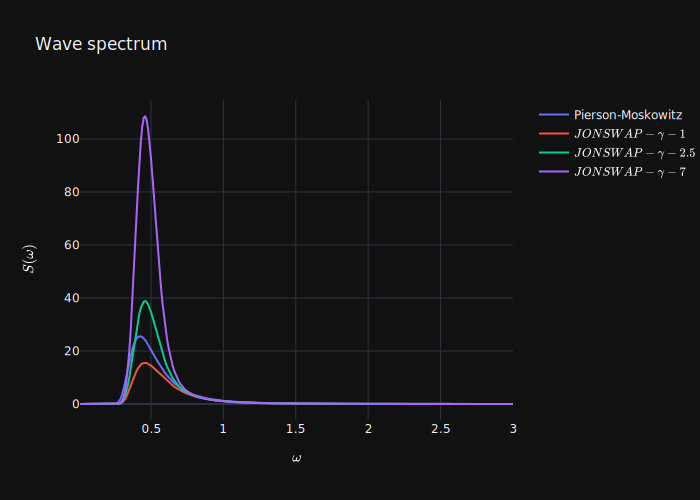

In [ ]:
mean_wave_period_s = 11.44
significant_wave_height_m = 11

spectrum_pm = PiersonMoskowitzSpectrumITTC1978(
    mean_wave_period_s=mean_wave_period_s,
    significant_wave_height_m=significant_wave_height_m
)
omega = np.linspace(0.01, 3, 300)
spectrum_density_pm = spectrum_pm.get_spectral_density_omega(omega_rad_per_s=omega)
fig = make_subplots()
fig.add_trace(go.Scatter(x=omega, y=spectrum_density_pm, name="Pierson-Moskowitz"))
fig.update_layout(title="Wave spectrum")
fig.update_xaxes(title="$\omega$")
fig.update_yaxes(title="$S(\omega)$")

for gamma in [1, 2.5, 7]:
    spectrum_jonswap = JONSWAPSpectrumITTC1984(
        significant_wave_height_m=significant_wave_height_m,
        mean_wave_period_s=mean_wave_period_s,
        gamma=gamma
    )
    spectrum_density = spectrum_jonswap.get_spectral_density_omega(omega_rad_per_s=omega)
    fig.add_trace(go.Scatter(x=omega, y=spectrum_density, name=f"$JONSWAP-\gamma-{gamma}$"))
fig.show(renderer="svg")

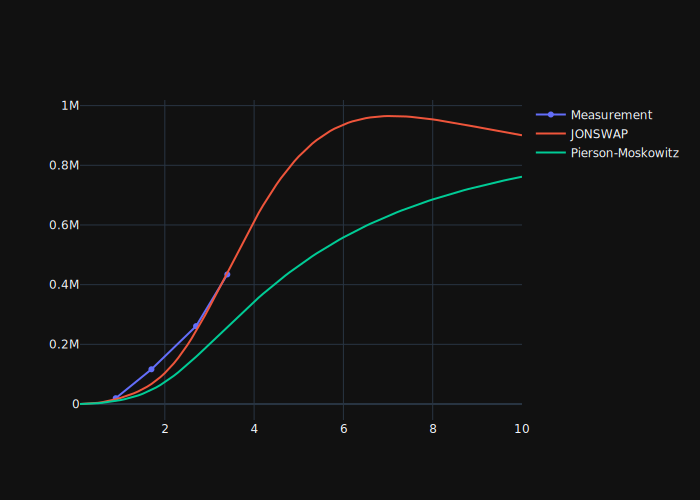

In [ ]:
# Test the added resistance
# The reference data are taken from "Lang X., Mao W., A semi-empirical model for ship speed loss prediction at head sea and its validation by full-scale measurements, Ocean Engineering, 2020"

ship_dimension = ShipDimensionsAddedResistance(
    b_beam_m=32.26,
    lpp_length_between_perpendiculars_m=190,
    cb_block_coefficient=0.6,
    ta_draft_aft_m=9.5,
    tf_draft_forward_m=9.5,
    kyy_radius_gyration_in_lateral_direction_non_dim=0.26
)

added_resistance_ref = dict(
    wave_height_m=np.array([0.9, 1.7, 2.7, 3.4]),
    added_resistance_n=np.array([19.4, 116.4, 261.0, 434.3]) * 1000
)

added_resistance = AddedResistanceByStaWave2(
    ship_dimension=ship_dimension,
    wave_spectrum_type=WaveSpectrumType.JONSWAP_ITTC_1984,
    gamma=3.3
)
froude_number = 0.2
speed_m_per_s = froude_number * np.sqrt(
    ship_dimension.lpp_length_between_perpendiculars_m
    * GRAVITY
)
r_aw_list = []
wave_length_list = []
speed_kn = m_per_s_to_kn(speed_m_per_s)
wave_height_array = np.linspace(0.1, 10, 100)
for wave_height in wave_height_array:
    wave_period = 5 * np.sqrt(wave_height)
    wave_length_list.append(wave_period ** 2 * GRAVITY / (2 * np.pi))
    weather = Weather(
        significant_wave_height_m=wave_height,
        mean_wave_period_s=wave_period
    )
    r_aw_list.append(added_resistance.get_added_resistance_newton(
        vessel_speed_kn=speed_kn, weather=weather
    )[0])

r_aw_pm_list = []
added_resistance = AddedResistanceByStaWave2(ship_dimension=ship_dimension)
for wave_height in wave_height_array:
    wave_period = 5 * np.sqrt(wave_height)
    weather = Weather(
        significant_wave_height_m=wave_height,
        mean_wave_period_s=wave_period
    )
    r_aw_pm_list.append(added_resistance.get_added_resistance_newton(
        vessel_speed_kn=speed_kn, weather=weather
    )[0])

fig = make_subplots()
fig.add_trace(go.Scatter(
    x=added_resistance_ref["wave_height_m"],
    y=added_resistance_ref["added_resistance_n"],
    name="Measurement"
))
fig.add_trace(go.Scatter(x=wave_height_array, y=r_aw_list, name="JONSWAP"))
fig.add_trace(go.Scatter(x=wave_height_array, y=r_aw_pm_list, name="Pierson-Moskowitz"))
fig.show(renderer="svg")

In [ ]:
# Test for the added resistance calculation for wave encounter angle > 45
weather.wave_direction_deg = np.array([180])
heading = weather.wave_direction_deg - (45 + random.random() * 100)
assert weather.wave_direction_deg - heading > 45
assert added_resistance.get_added_resistance_newton(
    vessel_speed_kn=16,
    weather=weather,
    heading_deg=heading
) == 0, "The addded resistance should be 0."


In [ ]:
# Test array input
vessel_speed = np.array([15]*100)
significant_wave_height_m_list = []
mean_wave_period_s_list = []
wave_height_array = np.linspace(0.1, 10, 100)
for wave_height in wave_height_array:
    significant_wave_height_m_list.append(wave_height)
    mean_wave_period_s_list.append(5 * np.sqrt(wave_height))

weather_array = Weather(significant_wave_height_m=np.array(significant_wave_height_m_list),
                        mean_wave_period_s=np.array(mean_wave_period_s_list))

In [ ]:
from scipy.special import gamma
import numpy as np
from scipy.integrate import quad
from plotly.subplots import make_subplots

In [ ]:
def _get_angular_component_in_angle(
        wave_angle_rad: float,
        encounter_angle_rad: float,
        is_swell: bool = False
    ) -> float:
    """Calculate angular distribution for a given encounter angle and spreading parameter.

    Reference: ITTC. (2021). Recommended Procedures and Guidelines: Preparation,
    Conduct and Analysis of Speed/Power Trials.

    @param encounter_angle_rad: Encounter angle in degrees
    @param is_swell: If True, use spreading parameter for swells (0.75),
    otherwise use spreading parameter for wind waves (1.0
    @return: Angular distribution
    """
    spreading_parameter = 0.75 if is_swell else 1.0
    gamma1 = gamma(1 + 2 * spreading_parameter)
    gamma2 = gamma(1 + spreading_parameter)
    angle_between = (wave_angle_rad - encounter_angle_rad) % (2 * np.pi)
    angle_between = angle_between - 2 * np.pi if angle_between > np.pi else angle_between
    angle_between = np.abs(angle_between)
    if angle_between > np.pi / 2:
        return 0.0
    return np.power(2, 2*spreading_parameter) * np.power(gamma2, 2) / (np.pi * gamma1) \
        * np.power(np.cos(angle_between), 2 * spreading_parameter)

In [ ]:
# Testing angular distribution function
angle_array = np.linspace(0, 2 * np.pi, 361)
fig = make_subplots()
fig_cart = make_subplots()
integrated_value = []
for index in range(5):
    encounter_angle = np.pi / 4 * index
    angular_distribution = np.array([
        _get_angular_component_in_angle(angle, encounter_angle_rad=encounter_angle, is_swell=False)
        for angle in angle_array
    ])
    fig.add_scatterpolar(
        r=angular_distribution,
        theta=angle_array * 180 / np.pi,
        name=f"Encounter angle: {encounter_angle * 180 / np.pi}"
    )
    fig_cart.add_scatter(
        x=angle_array * 180 / np.pi,
        y=angular_distribution,
        name=f"Encounter angle: {encounter_angle * 180 / np.pi}"
    )
    integrated_value.append(quad(
        func=_get_angular_component_in_angle,
        a=0,
        b=2 * np.pi,
        args=(encounter_angle, False)
    )[0])
fig.show()
fig_cart.show()
fig = make_subplots()
fig.add_scatter(
    x=np.linspace(0, np.pi, 5),
    y=np.array(integrated_value),
    name="Integrated value"
)
fig.show()


